# Degeneracy Detection on Planck 2018 ΛCDM Chains

Load Planck 2018 base ΛCDM posterior samples (TTTEEE+lowl+lowE+lensing),
run the degeneracy detector, and compare discovered relationships against
known cosmological degeneracies.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, '/anvil/scratch/x-ctirapongpra/degen_detector/')
from degen_detector import DegenDetector
from getdist import loadMCSamples

%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize': (14, 10)})

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## 1. Load Planck chains

In [2]:
chain_root = '../data/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing'
mc_samples = loadMCSamples(chain_root, settings={'ignore_rows': 0.3})

# Extract key cosmological parameters
target_params = ['omegam', 'H0', 'sigma8', 'ns', 'tau', 'logA']
param_obj = mc_samples.getParams()
samples = np.column_stack([getattr(param_obj, p) for p in target_params])

print(f'Samples shape: {samples.shape}')
print(f'Parameters: {target_params}')
print(f'\nMeans:')
for i, p in enumerate(target_params):
    print(f'  {p:>10s} = {np.mean(samples[:, i]):.5f} ± {np.std(samples[:, i]):.5f}')

Samples shape: (25225, 6)
Parameters: ['omegam', 'H0', 'sigma8', 'ns', 'tau', 'logA']

Means:
      omegam = 0.31531 ± 0.00737
          H0 = 67.35755 ± 0.53881
      sigma8 = 0.81119 ± 0.00602
          ns = 0.96489 ± 0.00417
         tau = 0.05437 ± 0.00736
        logA = 3.04448 ± 0.01424


## 2. Run degeneracy detector

In [30]:
detector = DegenDetector(samples, target_params)
results = detector.analyze_multi(
    mi_threshold=0.3,
    niterations=100,
    max_complexity=15,
    batching=True,  # Enable batching for large datasets
)

print(f'Groups found: {len(results.grouping.groups)}')
for i, g in enumerate(results.grouping.groups):
    print(f'  Group {i+1}: {g.param_names} (avg MI={g.avg_mi:.3f}, constraints={g.n_constraints})')

print(f'\nDegeneracies found: {len(results.multi_degeneracies)}')
for i, d in enumerate(results.multi_degeneracies):
    print(f'  {i+1}. {d.fit.equation_str}')
    print(f'     R² = {d.fit.r_squared:.4f}, complexity = {d.fit.complexity}')

[ Info: Started!



Expressions evaluated per second: 1.690e+03
Progress: 226 / 1500 total iterations (15.067%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.438e-05  0.000e+00  y = 0.31531
3           2.385e-05  4.121e-01  y = 21.24 / H0
5           1.191e-05  3.472e-01  y = log(11.251 / sqrt(H0))
10          1.162e-06  4.654e-01  y = exp(ns) * (((20.985 / H0) + -0.1957) / ns)
12          9.374e-07  1.073e-01  y = (exp(ns) * ((22.348 / H0) + -0.21572)) / (ns ^ ns)
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.990e+03
Progress: 526 / 1500 total iterations (

[ Info: Final population:
[ Info: Results saved to:


  - outputs/20260202_221336_RrqyCu/hall_of_fame.csv

Expressions evaluated per second: 2.410e+03
Progress: 321 / 1500 total iterations (21.400%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.903e-01  0.000e+00  y = 67.357
3           1.665e-01  2.781e-01  y = ns * 69.802
4           6.628e-03  3.223e+00  y = exp(4.525 - omegam)
5           5.965e-03  1.054e-01  y = (omegam ^ -0.32768) * 46.121
6           5.040e-03  1.686e-01  y = 140.13 - (exp(omegam) * 53.093)
8           5.028e-03  1.160e-03  y = (50.802 - (exp(omegam) * 52.431)) + 88.424
10          5.005e-03  2.247e-03  y = (133.3 - (exp(omegam) * 45.846)) + (omegam * -9.836)
15          4.932e-03  2.965e-03  y = 128.58 - ((71.567 * omegam) + ((ns * (ns * (ns * omega...
                                      m))) + 38.368))

[ Info: Started!



Expressions evaluated per second: 1.960e+03
Progress: 1042 / 1500 total iterations (69.467%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.903e-01  0.000e+00  y = 67.357
3           1.665e-01  2.781e-01  y = ns * 69.802
4           6.304e-03  3.274e+00  y = exp(4.5253 - omegam)
5           4.823e-03  2.678e-01  y = (omegam ^ -0.33635) * 45.681
7           4.811e-03  1.300e-03  y = (omegam ^ -0.33343) * (46.153 - omegam)
9           4.809e-03  1.899e-04  y = ((omegam ^ -0.33262) * (46.15 - omegam)) + 0.060768
10          4.802e-03  1.417e-03  y = (((omegam ^ -0.3359) * 45.644) - sqrt(omegam)) + 0.650...
                                      43
11          4.792e-03  2.013e-03  y = ((omegam ^ -0.33418) * 46.157) - sqrt(omegam + log(ns)...
                                      )


[ Info: Final population:
[ Info: Results saved to:


  - outputs/20260202_221406_w22HQj/hall_of_fame.csv

Expressions evaluated per second: 1.520e+03
Progress: 193 / 1500 total iterations (12.867%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.735e-05  0.000e+00  y = 0.96488
3           1.346e-05  1.269e-01  y = 0.89288 ^ omegam
5           1.087e-05  1.069e-01  y = (0.69786 ^ omegam) ^ omegam
6           9.640e-06  1.201e-01  y = (exp(omegam) ^ -0.34856) * 1.0766
9           9.531e-06  3.798e-03  y = (((0.090824 ^ omegam) + 0.4333) ^ -0.16416) ^ -2.1158
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per 

[ Info: Started!



Expressions evaluated per second: 1.240e+03
Progress: 486 / 1500 total iterations (32.400%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.735e-05  0.000e+00  y = 0.96489
3           1.346e-05  1.269e-01  y = 0.89288 ^ omegam
4           1.346e-05  8.148e-05  y = sqrt(0.79718 ^ omegam)
5           9.492e-06  3.494e-01  y = (0.64854 ^ omegam) + 0.092768
7           9.453e-06  2.046e-03  y = ((0.67027 ^ omegam) + 0.084428) ^ 1.0334
9           9.426e-06  1.409e-03  y = (((omegam ^ -0.97223) ^ 0.12813) + 0.0020752) * 0.8341...
                                      3
13          9.421e-06  1.386e-04  y = (((((H0 ^ omegam) + -0.21114) * 0.98208) ^ -0.09668) ^...
                                       0.99868) * 1.0889
15          9.418e-06  1.710e-04  y = 1.0888 * (((((0.98209 * (H0

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.735e-05  0.000e+00  y = 0.96489
3           1.346e-05  1.270e-01  y = 0.89271 ^ omegam
4           1.052e-05  2.465e-01  y = sqrt(1.2458 - omegam)
5           9.453e-06  1.069e-01  y = (0.64832 ^ omegam) + 0.092768
6           9.427e-06  2.812e-03  y = sqrt(sqrt(sqrt(0.23679 / omegam)))
9           9.426e-06  7.808e-06  y = (((omegam ^ -0.97223) ^ 0.12813) + 0.0020752) * 0.8341...
                                      3
11          9.418e-06  4.510e-04  y = ((((H0 ^ omegam) * 0.98208) + -0.21114) ^ -0.09668) * ...
                                      1.0889
13          9.418e-06  5.007e-06  y = 1.0889 * ((0.98208 * (((-0.21114 + H0) ^ omegam) + -0....
                                      21114)) ^ -0.09668)
───────────────────────────────────────────────────────────────────────────────────────────────────
  - outputs/20260202_221

[ Info: Started!



Expressions evaluated per second: 1.800e+03
Progress: 239 / 1500 total iterations (15.933%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.622e-05  0.000e+00  y = 0.81116
3           1.287e-05  5.174e-01  y = logA * 0.2664
4           1.285e-05  1.321e-03  y = log(1.3053 ^ logA)
5           1.151e-05  1.106e-01  y = (logA * 0.35378) - 0.26612
9           9.741e-06  4.161e-02  y = ((tau * -0.42161) + (logA * 0.55144)) - 0.84498
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.950e+03
Progress: 520 / 1500 total iterations (34.667%)
═══════════

[ Info: Final population:
[ Info: Results saved to:


  - outputs/20260202_221523_CAsfEW/hall_of_fame.csv

Expressions evaluated per second: 1.970e+03
Progress: 259 / 1500 total iterations (17.267%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.421e-05  0.000e+00  y = 0.054353
3           3.048e-05  2.879e-01  y = sigma8 + -0.75686
4           1.261e-05  8.827e-01  y = log(logA * 0.34682)
5           8.159e-06  4.354e-01  y = (logA * 0.47839) + -1.4022
8           7.548e-06  2.597e-02  y = (sqrt(logA - 0.53081) + -1.5576) ^ sigma8
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.


[ Info: Started!



Expressions evaluated per second: 1.910e+03
Progress: 505 / 1500 total iterations (33.667%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.421e-05  0.000e+00  y = 0.054353
3           3.048e-05  2.879e-01  y = sigma8 - 0.75685
4           1.261e-05  8.827e-01  y = log(logA * 0.34682)
5           8.159e-06  4.354e-01  y = (logA * 0.47839) + -1.4022
8           7.548e-06  2.597e-02  y = (sqrt(logA - 0.53081) + -1.5576) ^ sigma8
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.910e+03
Progress: 760 / 1500 total iterations (50.667%)
════════════

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.421e-05  0.000e+00  y = 0.054371
3           3.048e-05  2.879e-01  y = sigma8 - 0.75682
4           1.261e-05  8.827e-01  y = log(logA * 0.34682)
5           8.159e-06  4.354e-01  y = (logA * 0.47839) + -1.4022
7           7.723e-06  2.745e-02  y = ((logA * 0.40099) + -1.1766) / sigma8
8           7.548e-06  2.299e-02  y = (sqrt(logA - 0.53081) + -1.5576) ^ sigma8
9           7.368e-06  2.409e-02  y = (((logA + -2.9412) * 0.34755) / sigma8) / sigma8
11          7.365e-06  1.807e-04  y = ((((logA * 0.48282) + -1.4192) / sigma8) * 0.70762) / ...
                                      sigma8
12          7.124e-06  3.332e-02  y = (((sqrt(logA - 0.64457) + -1.5235) ^ sigma8) / sigma8)...
                                       * 0.86353
13          7.076e-06  6.798e-03  y = ((((logA * 0.23968) + -0.70613) / (sigma8 * sigma8)) /...
       

[ Info: Started!



Expressions evaluated per second: 2.100e+03
Progress: 269 / 1500 total iterations (17.933%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.026e-04  0.000e+00  y = 3.0445
3           6.363e-05  5.792e-01  y = tau + 2.99
4           5.969e-05  6.394e-02  y = exp(tau) + 1.9878
5           1.811e-05  1.193e+00  y = (tau + sigma8) + 2.1788
7           1.535e-05  8.265e-02  y = sigma8 + ((tau * 1.2045) + 2.1681)
10          1.520e-05  3.215e-03  y = ((tau / 0.33558) / exp(sigma8)) + (sigma8 - -2.1614)
13          1.512e-05  1.771e-03  y = ((sigma8 - -0.67105) + ((tau * (sigma8 ^ -0.3567)) / s...
                                      igma8)) - -1.4903
───────────────────────────────────────────────────────────────────────────────────────────────────
═══════════════════════════════════

[ Info: Final population:
[ Info: Results saved to:


Press 'q' and then <enter> to stop execution early.
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.026e-04  0.000e+00  y = 3.0445
3           6.363e-05  5.792e-01  y = tau + 2.99
4           3.979e-05  4.694e-01  y = sqrt(tau) + 2.8127
5           1.810e-05  7.880e-01  y = (tau + sigma8) - -2.1789
6           1.687e-05  7.008e-02  y = sigma8 + (exp(tau) + 1.1774)
7           1.513e-05  1.092e-01  y = sigma8 + (2.1663 + (tau / sigma8))
9           1.503e-05  3.283e-03  y = (sigma8 + (tau / (sigma8 - 0.034724))) + 2.1633
11          1.502e-05  2.424e-04  y = (tau / ((tau * -0.2979) + sigma8)) + (2.1649 + sigma8)
15          1.502e-05  2.779e-05  y = sigma8 + ((tau / (sigma8 + ((tau * -0.46159) / (sigma8...
                                       + sigma8)))) + 2.165)
───────────────────────────────────────────────────────────────────────────────────────────────────
Groups found: 2

## 3. Mutual Information Heatmap

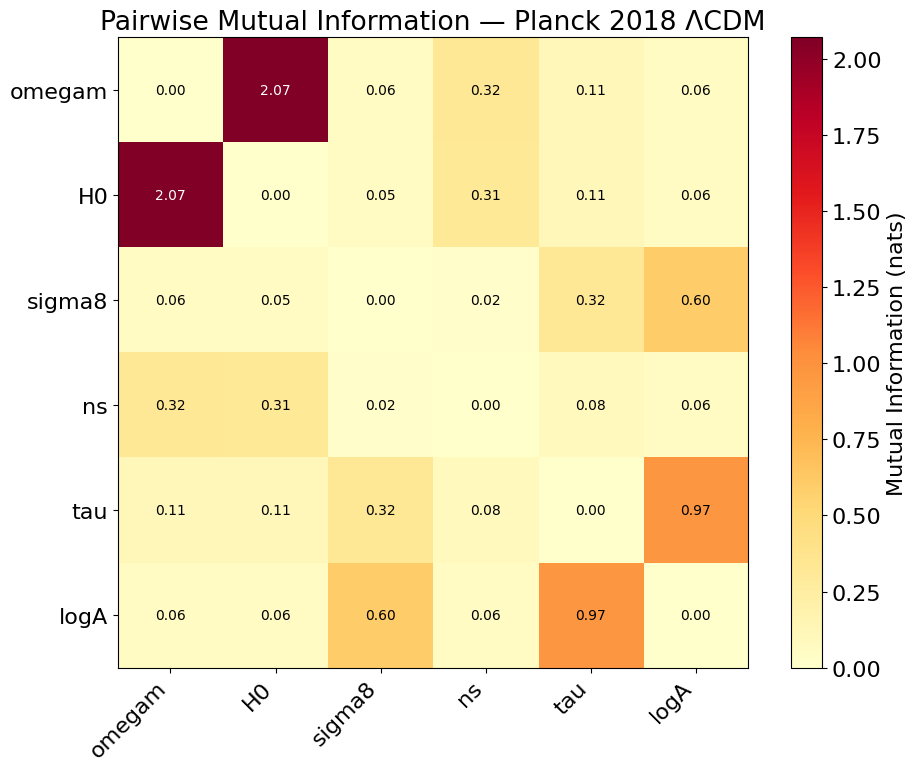

In [ ]:
mi = results.grouping.mi_result.mi_matrix
names = results.grouping.mi_result.param_names

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(mi, cmap='YlOrRd')
ax.set_xticks(range(len(names)))
ax.set_yticks(range(len(names)))
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_yticklabels(names)

# Annotate cells
for i in range(len(names)):
    for j in range(len(names)):
        ax.text(j, i, f'{mi[i,j]:.2f}', ha='center', va='center',
                color='white' if mi[i,j] > mi.max()/2 else 'black', fontsize=10)

plt.colorbar(im, label='Mutual Information (nats)')
ax.set_title('Pairwise Mutual Information — Planck 2018 ΛCDM')
plt.tight_layout()
#plt.savefig('../figures/mi_heatmap.pdf', dpi=150, bbox_inches='tight')
plt.show()

## 4. Parameter scatter plots with discovered equations

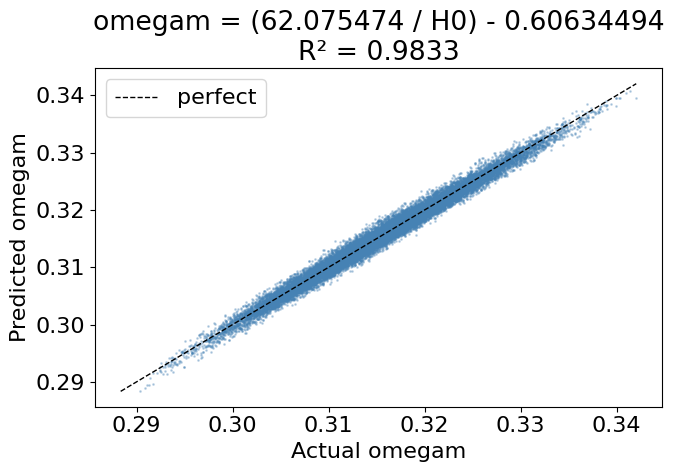

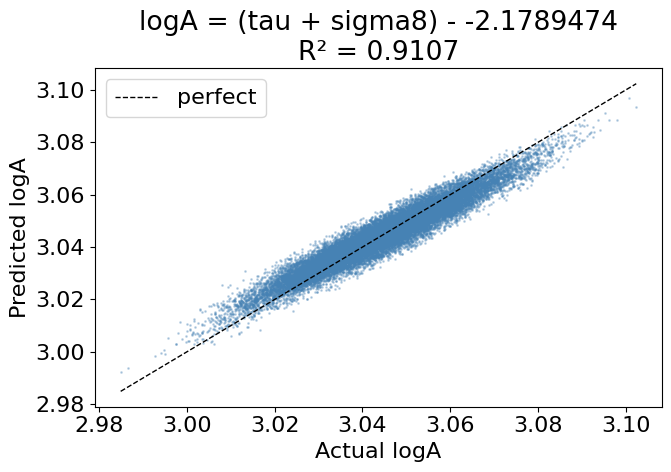

In [32]:
for d in results.multi_degeneracies:
    fit = d.fit

    # Get input and target data
    target_idx = target_params.index(fit.target_name)
    input_indices = [target_params.index(n) for n in fit.input_names]
    y_actual = samples[:, target_idx]
    X_input = samples[:, input_indices]
    y_pred = fit.predict(X_input)

    if len(fit.input_names) == 1:
        # 2D scatter: input vs target
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Left: raw scatter
        ax = axes[0]
        ax.scatter(X_input[:, 0], y_actual, s=1, alpha=0.3, c='steelblue')
        # Overlay predicted curve
        sort_idx = np.argsort(X_input[:, 0])
        ax.plot(X_input[sort_idx, 0], y_pred[sort_idx], 'r-', lw=2,
                label=fit.equation_str)
        ax.set_xlabel(fit.input_names[0])
        ax.set_ylabel(fit.target_name)
        ax.legend(fontsize=10)
        ax.set_title(f'Discovered: {fit.equation_str}')

        # Right: predicted vs actual
        ax = axes[1]
        ax.scatter(y_actual, y_pred, s=1, alpha=0.3, c='steelblue')
        lims = [min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())]
        ax.plot(lims, lims, 'k--', lw=1, label='perfect')
        ax.set_xlabel(f'Actual {fit.target_name}')
        ax.set_ylabel(f'Predicted {fit.target_name}')
        ax.set_title(f'R² = {fit.r_squared:.4f}')
        ax.legend()

    else:
        # Multi-input: predicted vs actual only
        fig, ax = plt.subplots(figsize=(7, 5))
        ax.scatter(y_actual, y_pred, s=1, alpha=0.3, c='steelblue')
        lims = [min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())]
        ax.plot(lims, lims, 'k--', lw=1, label='perfect')
        ax.set_xlabel(f'Actual {fit.target_name}')
        ax.set_ylabel(f'Predicted {fit.target_name}')
        ax.set_title(f'{fit.equation_str}\nR² = {fit.r_squared:.4f}')
        ax.legend()

    plt.tight_layout()
    plt.show()